In [1]:
# Import some packages that we will likely use.
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the json file into the notebook.
file = open('data/logins.json', 'r')

In [3]:
# Load the json data file into the notebook (creates list of dictionaries).
data = json.load(file)

In [4]:
# Check the data.
data['login_time'][:10]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52']

In [5]:
# Get rid of dictionary syntax.
mylist=[]

for key, value in data.items():
    mylist.append(value)

In [6]:
# Convert list of lists to pandas dataframe and name our column.
df = pd.DataFrame(mylist).T
df = df.rename(columns={0:'Time'})

In [7]:
# Check the data type of our Time column.
df.dtypes

Time    object
dtype: object

In [8]:
# Convert our Time column to a date-time object.
df.Time = df.Time.astype('datetime64')

In [9]:
# Create a new column filled with values of 1 for our aggregation to use when summing.
df['Login_Count'] = 1

In [10]:
# Check to see if the column's data type was changed.
df.dtypes

Time           datetime64[ns]
Login_Count             int64
dtype: object

In [11]:
# Aggregate our login times by 15 minute intervals and take the count of logins (this will also set the index as Time for us).
df = pd.DataFrame(df.groupby([pd.Grouper(key='Time', freq='15Min')]).sum())

Text(0, 0.5, 'Login Count')

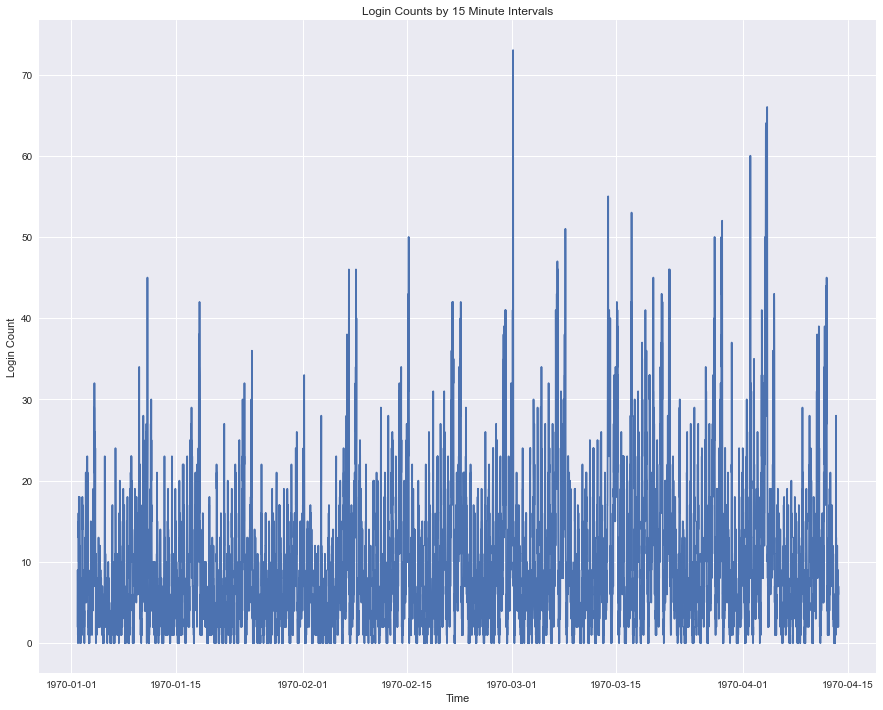

In [12]:
# Plot our time series.
plt.style.use('seaborn')
plt.figure(figsize=(15,12))
plt.plot(df.index, df.Login_Count)
plt.title('Login Counts by 15 Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Login Count')

We can see from the plot that generally, as time goes on login counts go up. We also can see that there are spikes in login counts that occur throughout the whole time series. We may suspect that these spikes are on weekends since that's when we would expect the most logins to occur.

In [13]:
# Look at the details of our time series.
df.describe()

,Login_Count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


C:\Users\justi\AppData\Local\Temp/ipykernel_17616/3535019390.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week'] = df.index.week


Text(0, 0.5, 'Average Login Count')

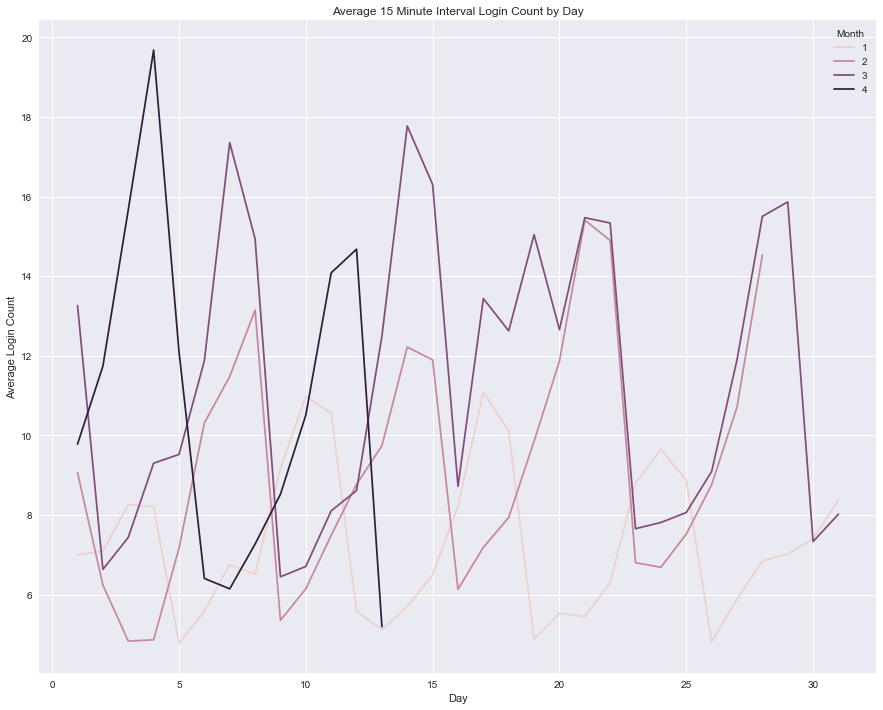

In [14]:
# Plot the time series with Day as the x axis to view monthly trends.
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Week'] = df.index.week
df['Weekday'] = df.index.weekday
df['Hour'] = df.index.hour

plt.figure(figsize=(15,12))
sns.lineplot(x='Day', y='Login_Count', hue='Month', data=df, ci=None)
plt.title('Average 15 Minute Interval Login Count by Day')
plt.xlabel('Day')
plt.ylabel('Average Login Count')

The plot shows no obvious trend from month to month, but does seem to spike about every 7 days regardless of month. This indicated that what we suspected may indeed be true: that there are more logins on the weekends. Let's check this.

Text(0, 0.5, 'Average Login Count')

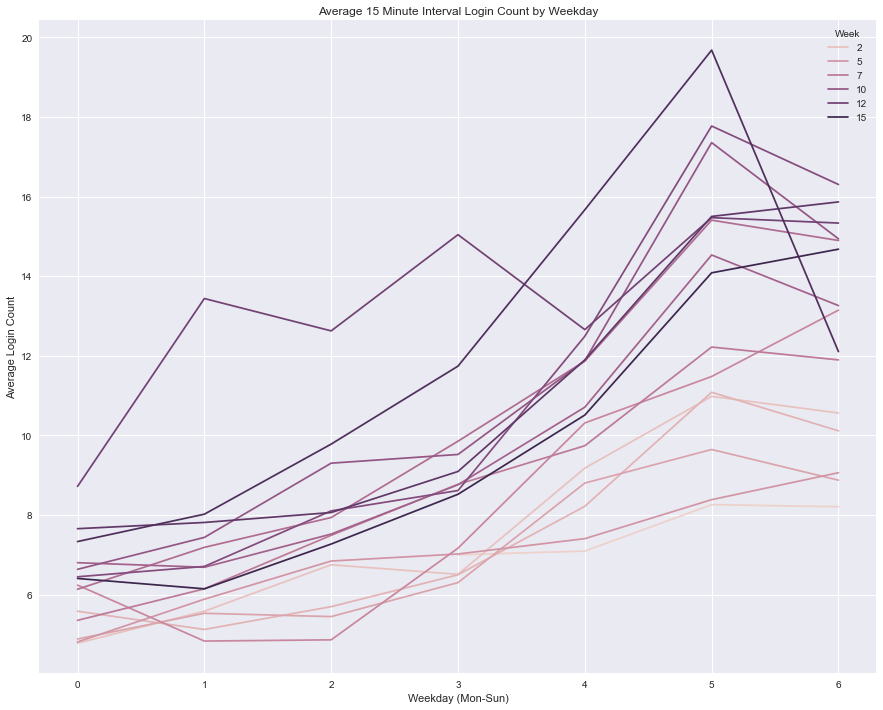

In [15]:
# Plot the time series with Weekday as the x axis to view weekly trends.
plt.figure(figsize=(15,12))
sns.lineplot(x='Weekday', y='Login_Count', hue='Week', data=df, ci=None)
plt.title('Average 15 Minute Interval Login Count by Weekday')
plt.xlabel('Weekday (Mon-Sun)')
plt.ylabel('Average Login Count')

In the plot above day 0 represents Monday and day 6 represents Sunday. We see that the average 15 minute login count increases as we get closer to the weekend and then drops off on Monday. Weekends are the days that have the most logins. We can also deduce that as time has gone one, the number of logins in 15 minute intervals has gone up since the most logins come from later weeks (darker lines). Let's next look at daily cycles across all months in our data to see if certain hours of the day tend to have more logins.

Text(0, 0.5, 'Average Login Count')

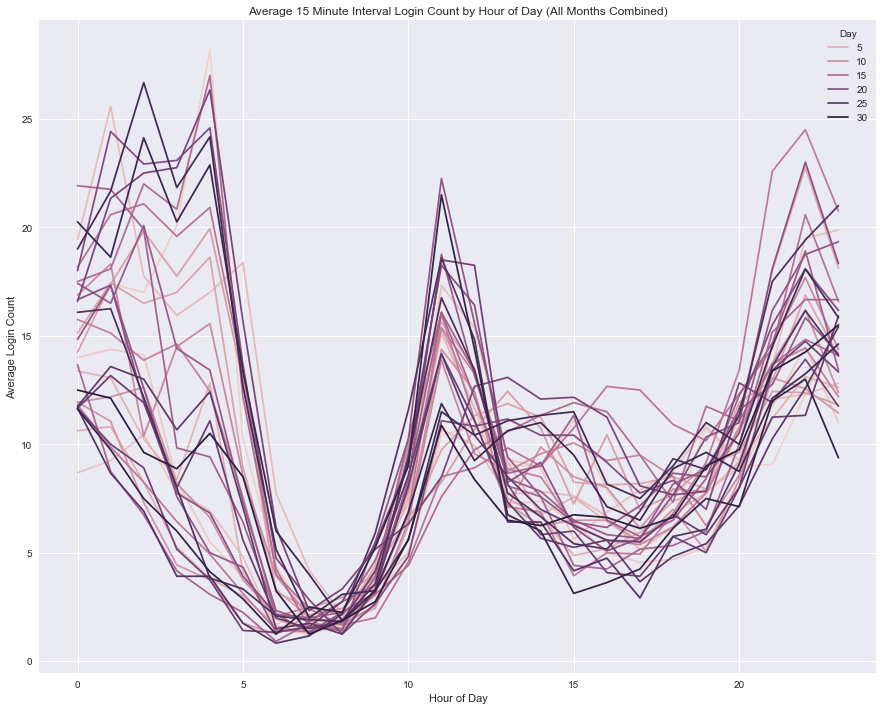

In [16]:
# Plot the time series with Hour as the x axis to view daily trends for each day across all months combined (day 1 for all months aggregated together, etc.).
plt.figure(figsize=(15,12))
sns.lineplot(x='Hour', y='Login_Count', hue='Day', data=df, ci=None)
plt.title('Average 15 Minute Interval Login Count by Hour of Day (All Months Combined)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Login Count')

Now let's plot the same information but broken down by month.

Text(0.5, 0.98, 'Average 15 Minute Interval Login Count by Hour of Day (Each Month)')

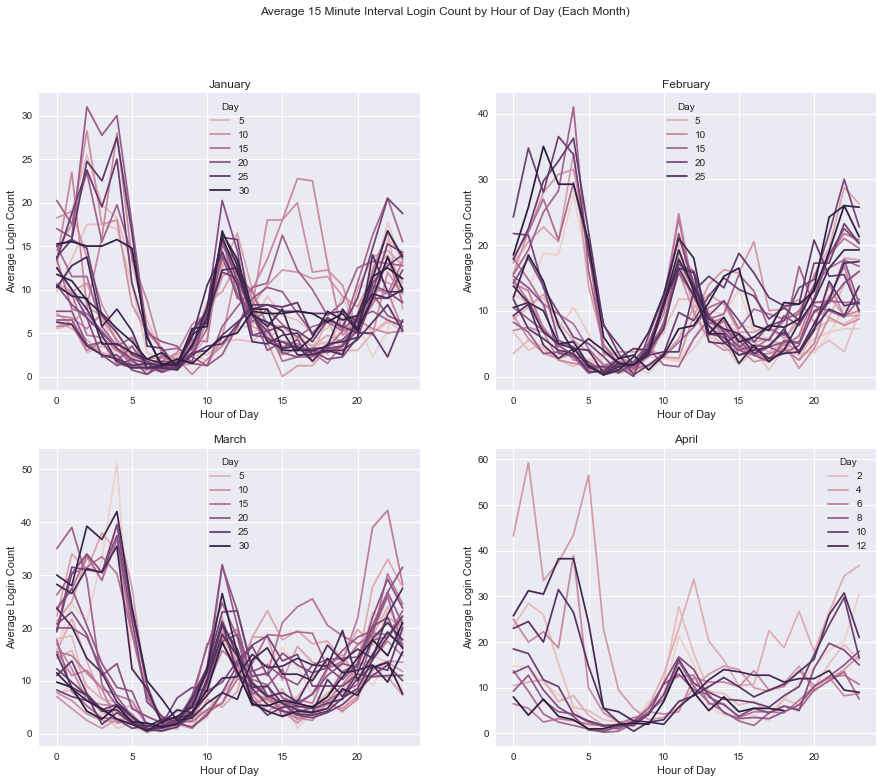

In [17]:
# Plot the time series with Hour as the x axis to view daily trends for each day in each month seperately.
fig, ax = plt.subplots(2, 2, figsize = (15,12))
sns.lineplot(x='Hour', y='Login_Count', hue='Day', data=df[df.Month==1], ci=None, ax= ax[0,0])
sns.lineplot(x='Hour', y='Login_Count', hue='Day', data=df[df.Month==2], ci=None, ax= ax[0,1])
sns.lineplot(x='Hour', y='Login_Count', hue='Day', data=df[df.Month==3], ci=None, ax= ax[1,0])
sns.lineplot(x='Hour', y='Login_Count', hue='Day', data=df[df.Month==4], ci=None, ax= ax[1,1])
ax[0,0].title.set_text('January')
ax[0,0].set(xlabel='Hour of Day', ylabel='Average Login Count')
ax[0,1].title.set_text('February')
ax[0,1].set(xlabel='Hour of Day', ylabel='Average Login Count')
ax[1,0].title.set_text('March')
ax[1,0].set(xlabel='Hour of Day', ylabel='Average Login Count')
ax[1,1].title.set_text('April')
ax[1,1].set(xlabel='Hour of Day', ylabel='Average Login Count')
plt.suptitle('Average 15 Minute Interval Login Count by Hour of Day (Each Month)')

These plots show that the time of day with the most logins is typically late night into the early morning, followed by mid-day (around noon). In addition to concluding with this information, we should recall that weekend days are the ones with the most logins and that they are generally increasing each week. If we were interested in doing more EDA before building a predictive model we could next look into how login times vary for different hours on weekends only. This would tell us what exact times of the week have the most logins. If we were to build a predictive model using our data we would want to next make it stationary if necessary as well as account for trends using decomposition.